<h1> Assignment I: Network Theory </h1>

<p> In this assignment I will be exploring Fourier Series of a Sawtooth Wave of desired frequency. I will also explore the Drichlet Kernel is 3D space and test numerically calculate its integral for different values of parameters using Simpson's 1/3rd rule. </p>

<h2> Importing the Necessary Libraries </h2>
<li>Numpy: For performing mathematical operations.</li>
<li>Matplotlib: For visualising our functions and operations.</li>
<li>Scipy: Used to generate signals such as the Sawtooth wave.</li>
<li>mplot3d: Used to plot 3D data.</li>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from mpl_toolkits import mplot3d

<h2> Calculating the Fourier Series </h2>
<p> We are given a sawtooth wave described by the function,</p>

$$
x(t) = \left\{
    \begin{array}\\
        \frac{2t}{T}   &    \mbox{    if } \ x \in [\frac{-T}{2}, \frac{T}{2}] \\
        0 & \mbox{otherwise } \\
    \end{array}
\right.
$$

<h2>Fourier Series for Sawtooth Wave:</h2>

$$ x(t) = \sum_{n=1}^{+\infty} (-1)^{n-1} \frac{2}{n\pi} \sin(n\omega t)$$

<h2> I have used an OOPs approach to solving the problem as it gives us more flexibility </h2>
<h3>Functions:</h3>
<p> A list of function and their uses are given below: </p>
<li>__init__ function: This function is used to initialise our Fourier Series Object. It takes the frequency of the saw tooth wave as input
<li>fit_sawtooth_wave: This function calculates the Fourier Series terms according to formula given above. It takes as input the number of terms in the series</li>
<li>plot_wave: This function plots the resultant wave generated by our Fourier Series. It can also plot the orignal sawtooth wave if asked. It takes as input a list of number of terms in each wave that we want to plot, i.e., for each number in num_waves it will generate a fourier series corresponding to that number and plot it.</li>
<li>plot_error: This function plots the power error percentage.</li>
<li>simpson_integral_estimator: Given an array of function values it calculates the integral numerically. It takes as input an array of function values and the size of integrals steps h.</li>
<li>drichlet_kernel: Calculates and plots the value of the drichlet kernel for a given N in the asked interval. It takes as input the value N.</li>
<li>compute_integral: Calculates and Plots the value of the integral of the fejer kernel. It takes as input a list of values of N for which to calculate the integral and then plots the corresponding graph. It can also calculate the absolute value of the integrals if required</li>
<\li>

In [2]:
class FourierSeries:
    def __init__(self, freq):
        self.T_ = 1/freq #Caclulates the Time period of the wave.
        self.W_ = 2*np.pi*freq #Calculates the angular frequency of the wave.
        
    def fit_sawtooth_wave(self, num_terms):
        t = np.linspace(-(1.5)*(self.T_),(1.5)*(self.T_),3000)
        y = 0
        for i in range(1,num_terms+1):
            y += ((-1)**(i+1))*(2/(i*np.pi))*(np.sin(i*self.W_*t)) #Calculates and sums the Fourier Series terms.
        return y
    
    def plot_wave(self, num_waves, plot_orignal=False):
        #Wave Prep
        t = np.linspace(-(1.5)*(self.T_),(1.5)*(self.T_),3000)
        fig,ax = plt.subplots(figsize=[8,8],dpi=150)
        orignal_wave = signal.sawtooth(self.W_*(t-self.T_/2))
        ax.set_title("Fourier Series for Sawtooth Wave of frequency "+str(1/self.T_))
        ax.set_xlabel("Time --->")
        ax.set_ylabel("Signal Value --->")
        ax.axhline(0,color='k')
        ax.axvline(0,color='k')
        ax.set_xlim(-(1.5)*(self.T_)-0.01,(1.5)*(self.T_)+0.01)
        
        #Plots the orignal wave if asked.
        if plot_orignal==True:
            ax.plot(t,orignal_wave,label="Orignal Wave")
            ax.legend()
        
        #Plots the wave form for non-kernelised fourier series
        y = np.zeros([len(num_waves),3000])
        for i in range(0,len(num_waves)):
            y[i,:] = self.fit_sawtooth_wave(num_waves[i])
            if i in range(0,len(num_waves)):
                ax.plot(t, y[i,:],label="N = "+str(num_waves[i]))
            ax.legend()
        return
    def plot_error(self, num_waves):
        t = np.linspace(-(1.5)*(self.T_),(1.5)*(self.T_),3000)
        pass
    def simpson_integral_estimator(self, func_val, h):
        n = len(func_val)
        I = func_val[0] + func_val[n-1]
        for i in range(1,int((n)/2)):
            I = I + 2*func_val[2*i]
        for i in range(1, int((n)/2)):
            I = I + 4*func_val[2*i - 1]
        I = I*h/3
        return I
    def drichlet_kernel(self,N):
        t = np.linspace(-(1.5)*(self.T_),(1.5)*(self.T_),5000)
        fig,ax = plt.subplots(figsize=[8,8],dpi=150)
        ax.axhline(0,color='black')
        for i in N:
            DK = (1/(2*np.pi))*(np.sin((i)*t))/(np.sin(t/2))           
            ax.plot(t,DK,label="N = "+str(i))
        ax.legend()
        return
    def compute_integral(self, N=[],up=2*np.pi,low=0,abs_val=False):
        I = []
        fig, ax = plt.subplots(figsize=[7,7])
        t = np.linspace(low+0.01,up+0.01,5000)
        for i in N:
            DK = (1/(2*np.pi))*(np.sin((i)*t))/(np.sin(t/2)) 
            if abs_val:
                DK = np.abs(DK)
            I.append(self.simpson_integral_estimator(DK, (up-low)/500))
        ax.plot(N,I)
        ax.scatter(N,I,s=50)
        return

<h3>Creating a FourierSeries Object </h3>

In [3]:
fej_obj = FourierSeries(1)

<p>Assuming T=1 and taking 1000 steps in one time period I will now simulate the Fourier Series for three time periods. The number of terms will be 3, 5, 10 and 20.</p>

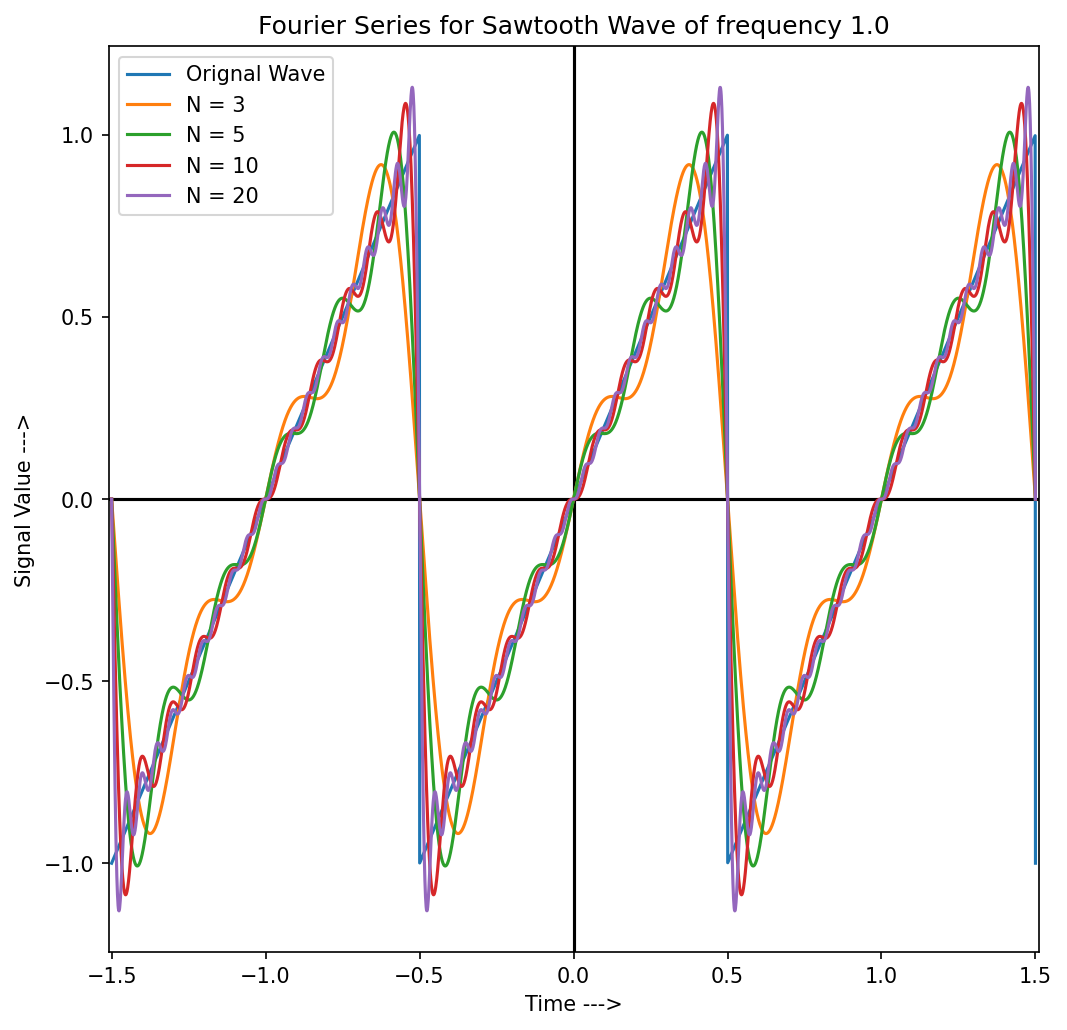

In [4]:
fej_obj.plot_wave([3,5,10,20],plot_orignal=True)

<h2>Plotting The Drichlet Kernel in 2D</h2>

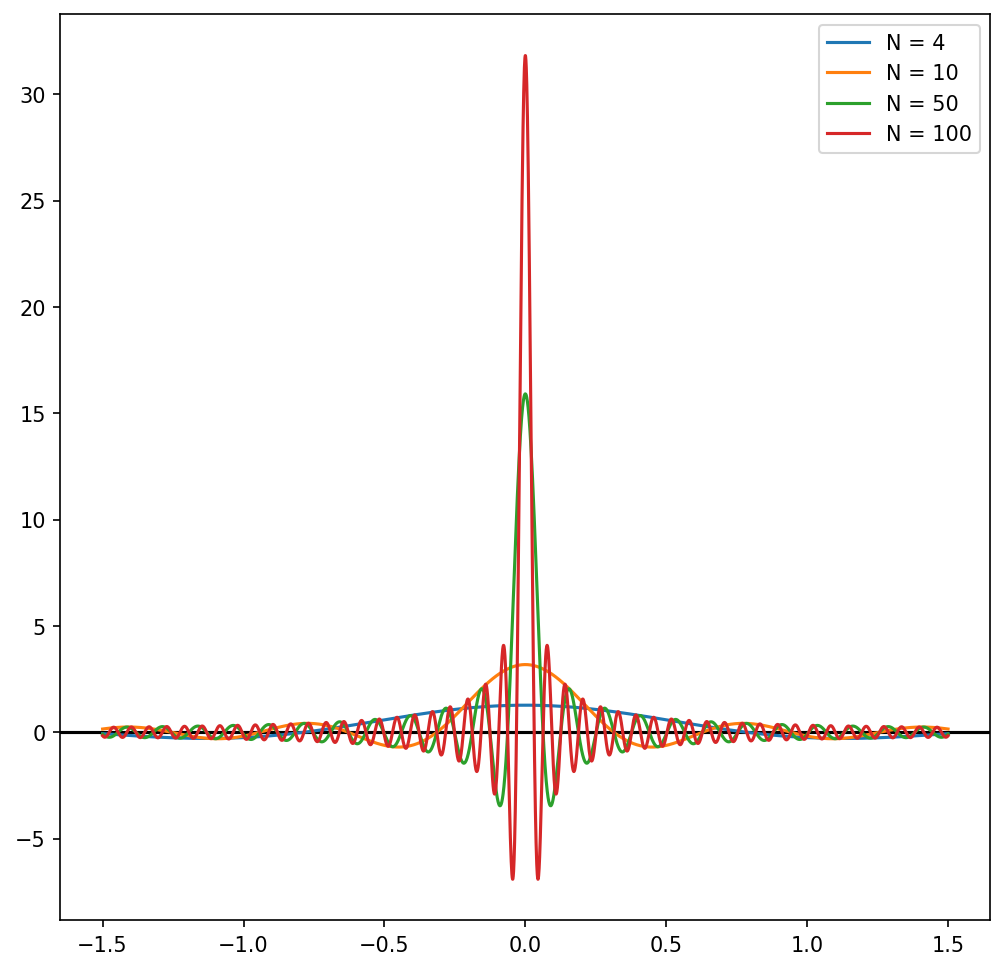

In [5]:
fej_obj.drichlet_kernel([4,10,50,100])

<h2> Plotting the Drichlet Kernel in 3D </h2>

<p>This function generates the z-coordinates for the kernel</p>

In [6]:
def drichlet_kernel(N,i=1,o=1):
    if i==1:
        t = np.linspace(np.pi,0.1,5000)
        t = t-o
    if i==2:
        t = np.linspace(-np.pi,-0.1,5000)
        t = t-o
    DK = (1/(2*np.pi))*(np.sin((N)*t))/(np.sin(t/2))
    return DK 

<p>We now generate the unit circle</p>

In [7]:
X = np.linspace(-1,1,5000)
Y_1 = 1 - np.multiply(X,X)
Y_2 = -Y_1

<p>We now Plot the Kernel</p>

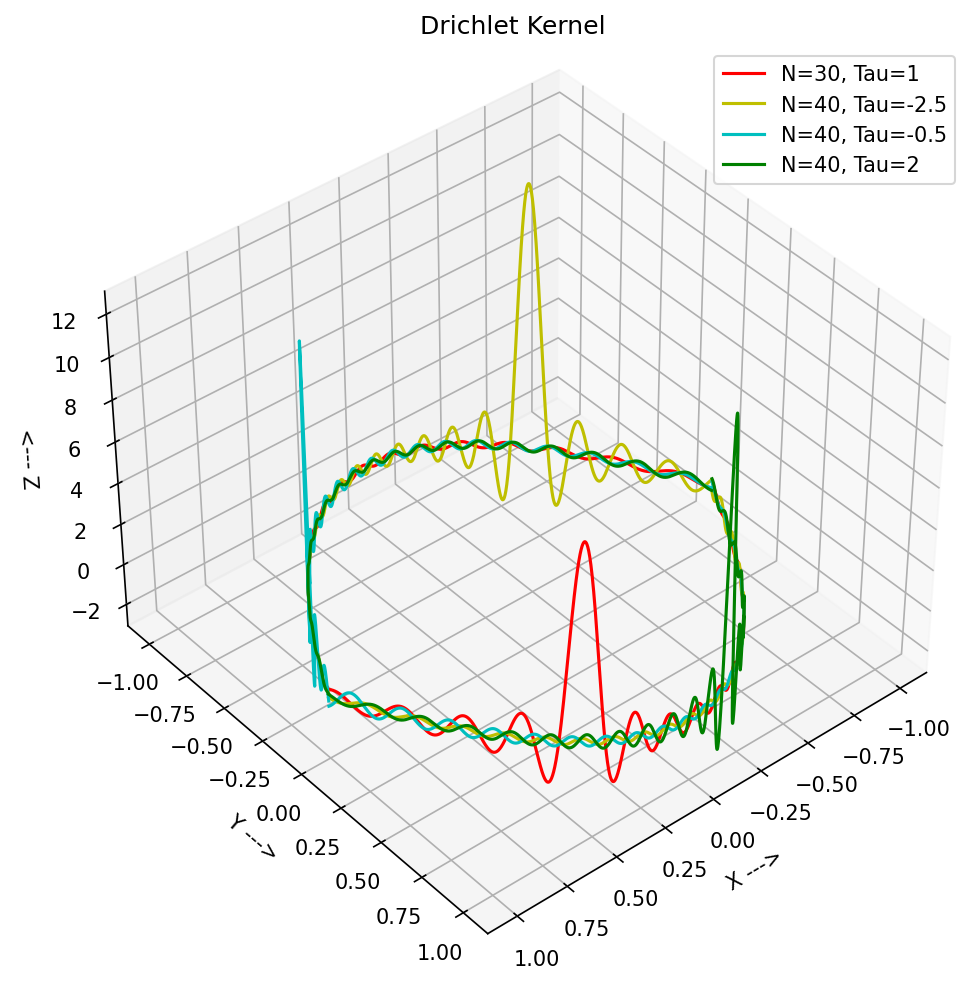

In [8]:
fig_3d = plt.figure(figsize=[8,8],dpi=150)
ax_3d = plt.axes(projection='3d')
ax_3d.set_title("Drichlet Kernel")
ax_3d.set_xlabel("X --->")
ax_3d.set_ylabel("Y --->")
ax_3d.set_zlabel("<--- Z")
ax_3d.plot3D(X,Y_1,drichlet_kernel(30,1,1),color='red',label="N=30, Tau=1")
ax_3d.plot3D(X,Y_2,drichlet_kernel(30,2,1),color='red')
ax_3d.plot3D(X,Y_1,drichlet_kernel(40,1,-2.5),color='y',label="N=40, Tau=-2.5")
ax_3d.plot3D(X,Y_2,drichlet_kernel(40,2,-2.5),color='y')
ax_3d.plot3D(X,Y_1,drichlet_kernel(40,1,-0.5),color='c',label="N=40, Tau=-0.5")
ax_3d.plot3D(X,Y_2,drichlet_kernel(40,2,-0.5),color='c')
ax_3d.plot3D(X,Y_1,drichlet_kernel(40,1,2),color='g',label="N=40, Tau=2")
ax_3d.plot3D(X,Y_2,drichlet_kernel(40,2,2),color='g')
ax_3d.legend()
ax_3d.view_init(40,50)

<h2>Computing and Plotting the Integral of the Drichilet Kernel </h2>

$$
I_{n} = \int_{0}^{2\pi} D_{n}(\tau)d\tau
$$

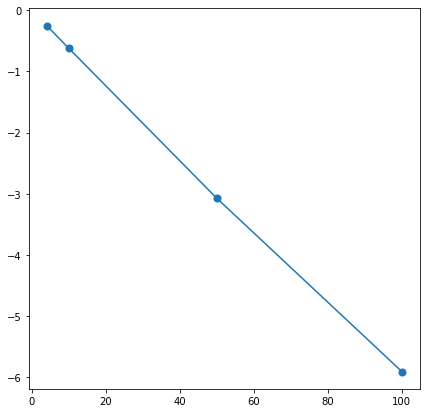

In [9]:
fej_obj.compute_integral([4,10,50,100])

<h4>Computing the absolute values: </h4>

$$
I_{n} = \int_{0}^{2\pi} |D_{n}(\tau)|d\tau
$$

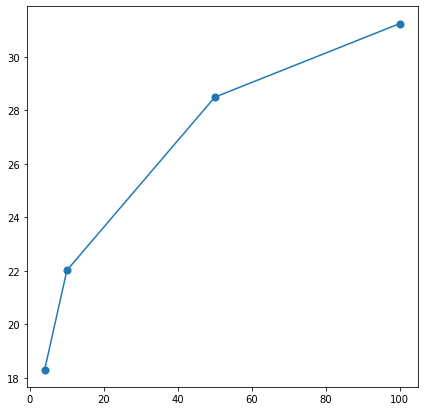

In [10]:
fej_obj.compute_integral([4,10,50,100],abs_val=True)